## Error로 분류
1. 중앙에 위치한 파동 **앞, 뒤에 다른 파동** 있는 경우
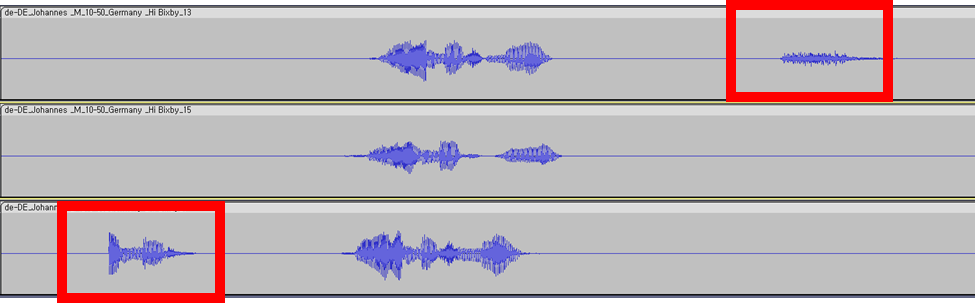 
<br>
2. 파동 앞 또는 뒤에 **공백이 너무 없는** 경우(0.5~1초 미만)
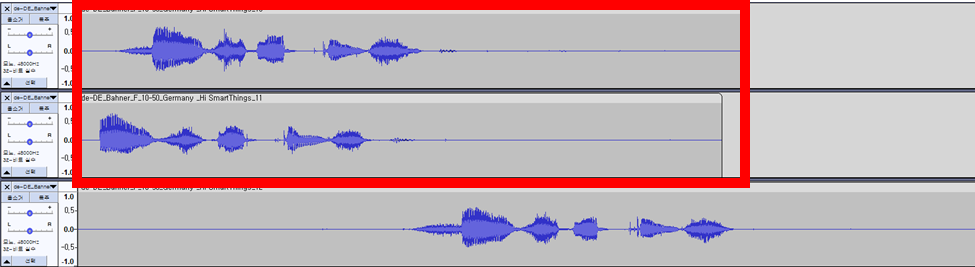 
<br>
3. **파장이 아예 없는** 경우
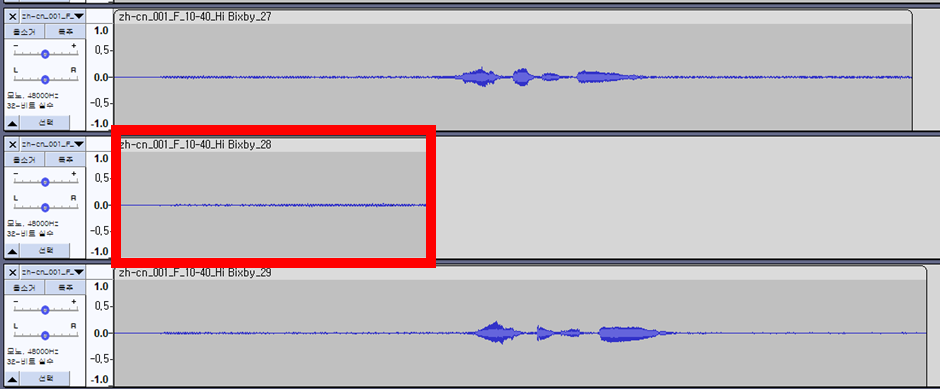 

In [148]:
import os
import shutil

import IPython
from scipy.io import wavfile
import scipy.signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from scipy.signal import hilbert, chirp
%matplotlib inline

In [28]:
SAMPLE_DIR = './../data/samples/'
TRAIN_DIR = './../data/train/'
TEST_DIR = './../data/test/'

if not os.path.isdir(TRAIN_DIR):
    os.makedirs(TRAIN_DIR)
if not os.path.isdir(TEST_DIR):
    os.makedirs(TEST_DIR)

In [36]:
sample_folders = os.listdir(SAMPLE_DIR)  # 'Chris, F'와 같은 샘플 폴더

for folder in sample_folders:
    wav_list = os.listdir(SAMPLE_DIR + folder)
    train_list = [file for file in wav_list if wav_list.index(file)%2==0]
    test_list = [file for file in wav_list if wav_list.index(file)%2!=0]
    for train_file in train_list:
        if not os.path.exists(TRAIN_DIR + '/' + train_file):
            shutil.copy(SAMPLE_DIR + folder + '/' + train_file, 
                        TRAIN_DIR + '/' + train_file)
    for test_file in test_list:
        if not os.path.exists(TEST_DIR + '/' + test_file):
            shutil.copy(SAMPLE_DIR + folder + '/' + test_file, 
                        TEST_DIR + '/' + test_file)

Sample Rate : 48000
Whole data : (201578,)
Data Length(sec) 4.199520833333334


C:\Users\lynn1\AppData\Local\Temp\ipykernel_1612\1606316538.py:3: WavFileWarning: Reached EOF prematurely; finished at 403200 bytes, expected 403236 bytes from header.
  samplerate, wav = wavfile.read(wav_loc)


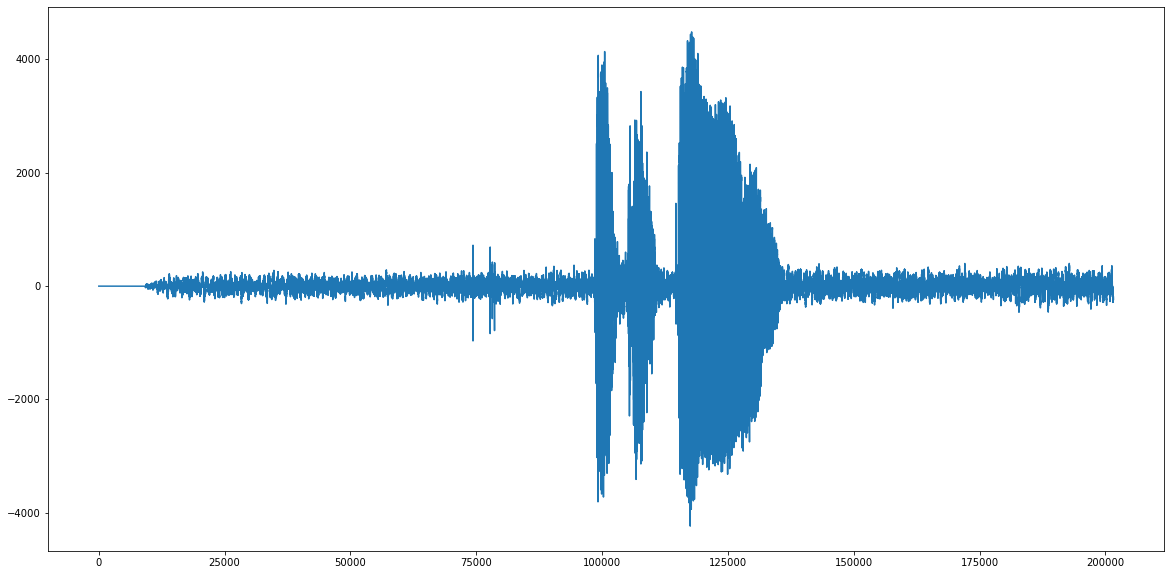

In [225]:
wav_loc = "./../zh-cn_001_F_10-40_Bixby_4.wav"

samplerate, wav = wavfile.read(wav_loc)
sec = np.arange(len(wav))/float(samplerate)
print('Sample Rate :', samplerate)  # 데이터의 밀도 / 1초
print('Whole data :', wav.shape)  # 전체 길이 (samplerate*초)
print('Data Length(sec)', sec[-1])  # 데이터 길이(초)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(wav)

In [226]:
samplerate

48000

In [228]:
wav_loc = "./../zh-cn_001_F_10-40_Bixby_4.wav"

samplerate, wav = wavfile.read(wav_loc)
sec = np.arange(len(wav))/float(samplerate)
print('Sample Rate :', samplerate)  # 데이터의 밀도 / 1초
print('Whole data :', wav.shape)  # 전체 길이 (samplerate*초)
print('Data Length(sec)', sec[-1])  # 데이터 길이(초)

# wav_resample = librosa.resample(wav, samplerate, samplerate/10)
# fig, ax = plt.subplots(figsize=(20,10))
# ax.plot(wav_resample)

Sample Rate : 48000
Whole data : (201578,)
Data Length(sec) 4.199520833333334


C:\Users\lynn1\AppData\Local\Temp\ipykernel_1612\3119301195.py:3: WavFileWarning: Reached EOF prematurely; finished at 403200 bytes, expected 403236 bytes from header.
  samplerate, wav = wavfile.read(wav_loc)


In [9]:
IPython.display.Audio(data=wav, rate=samplerate)

22050


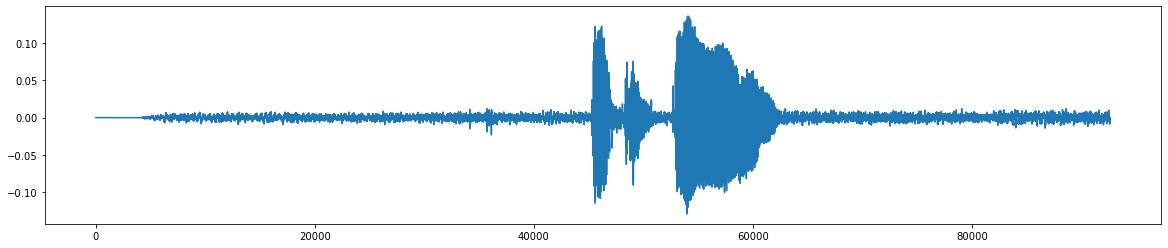

In [197]:
wav, samplerate = librosa.load(wav_loc)

print(samplerate)
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(wav)

C:\Users\lynn1\AppData\Local\Temp\ipykernel_1612\1621612906.py:1: FutureWarning: Pass orig_sr=22050, target_sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  wav_resample = librosa.resample(wav, samplerate, samplerate)


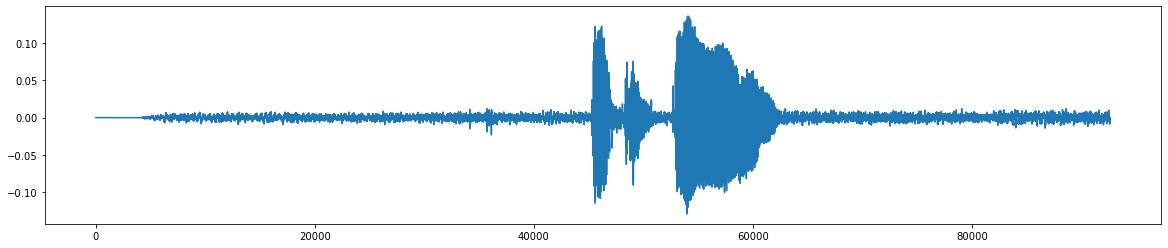

In [138]:
wav_resample = librosa.resample(wav, samplerate, samplerate)

fig, ax = plt.subplots(figsize=(20,4))
ax.plot(wav_resample)

# 분석

In [163]:
np.set_printoptions(precision=6, suppress=True)
 
pd.options.display.float_format = '{:.5f}'.format
# pd.reset_option('display.float_format')
pd.set_option('display.float_format', '{:.2f}'.format)

In [185]:
m = np.abs(wav[58000:60000]).mean()
m

76.169

# Audio Data Analysis Methods

### STFT (Short-Time Fourier Transform)  
시간 정보가 유실되는 것을 방지하기 위해 사전에 정의한 시간의 간격(window or frame) 단위로 쪼개 푸리에 변환  
1. FFT/STFT 변환 결과 -> 복소수 -> 실제 신호의 크기(Magnitude) 변환 `np.abs(librosa.stft(y))`   
2. Sound의 세기는 Amplitude보다 dB로 처리되므로, Amplitude(magnitude) -> dB 변환 `amplitude_to_db()`

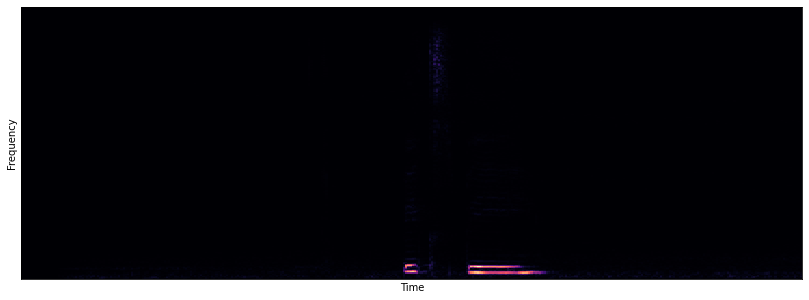

In [62]:
n_fft = 512
win_length = 512
hop_length = 256 

stft = librosa.stft(wav, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)
fig = plt.figure(figsize=(14,5))
librosa.display.specshow(spectrogram, sr=samplerate, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
# plt.plasma()
plt.show()

푸리에 변환 이후 dB scailing을 적용한 Log-spectogram 구함  
librosa.amplitude_to_db()

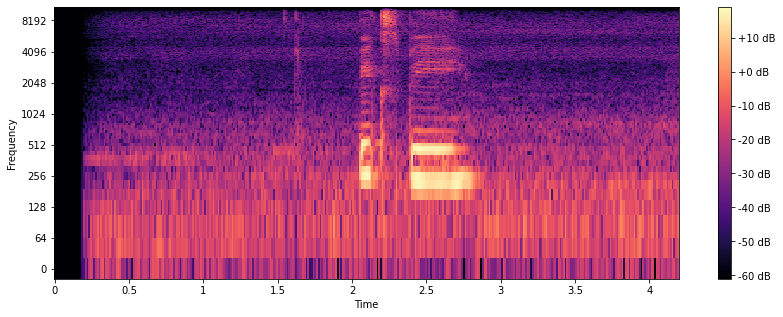

In [108]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)  # dB로 변환

fig = plt.figure(figsize = (14,5))
librosa.display.specshow(log_spectrogram, 
                         sr=samplerate, 
                         hop_length=hop_length,
                         x_axis='time',
                         y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

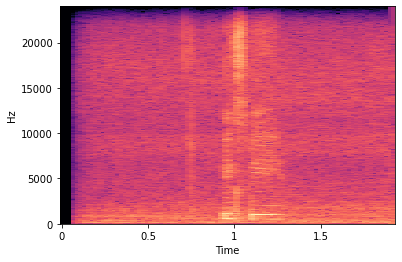

In [51]:
stft_result = librosa.stft(wav, n_fft=4096, win_length=4096, hop_length=1024)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=samplerate, hop_length=1024, y_axis='linear', x_axis='time')
# win_length : 그래프의 길이
# hop_length : window 크기, 자를 시간의 주기, 얼마만큼의 시간 주기를 이동하면서 분석할지
# n_fft : win_length보다 길 경우 zero padding해서 처리
plt.show()

### FFT (Fast Fourier Transform)  
어떤 주파수에 많이 분포해있는지

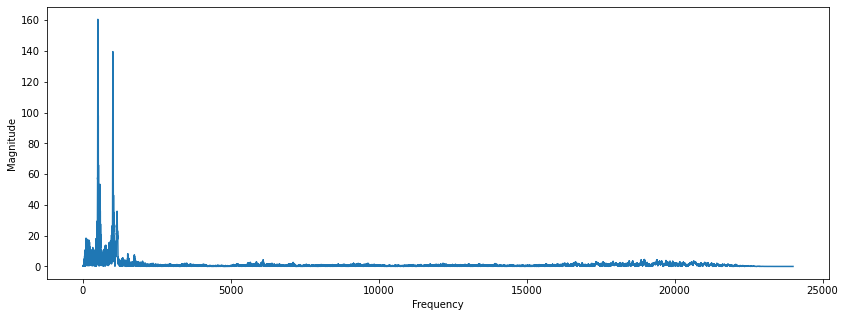

In [53]:
fft = np.fft.fft(amp) 

magnitude = np.abs(fft)
frequency = np.linspace(0, samplerate, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

fig = plt.figure(figsize = (14,5))
plt.plot(left_frequency, left_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### MFCC (Mel Frequency Cepstral Coefficient)  
소리 데이터의 특징값(feature)  
사람의 청각이 예민하게 반응하는 정보를 강조 -> 소리가 가지는 고유한 특징을 추출한 값  
librosa.feature.mfcc()

C:\Users\lynn1\AppData\Local\Temp\ipykernel_1612\781209740.py:1: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00573423 -0.006901
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(wav,


MFCCs Shape:  (13, 362)


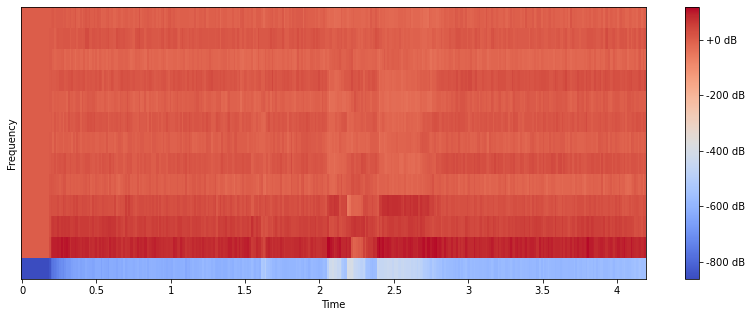

In [66]:
MFCCs = librosa.feature.mfcc(wav, 
                             sr=samplerate,
                             n_fft=n_fft,
                             hop_length=hop_length,
                             n_mfcc=13)   # number of coefficient we want to extract
print("MFCCs Shape: ", MFCCs.shape)

fig = plt.figure(figsize = (14,5))
librosa.display.specshow(MFCCs, 
                         sr=samplerate, 
                         hop_length=hop_length,
                         x_axis='time',)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

### Spectral(Amplitude) Envelope

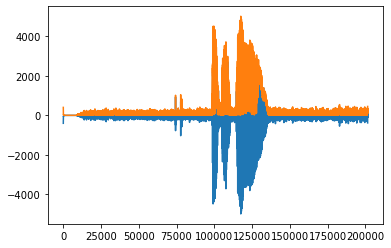

In [213]:
analytic_signal = hilbert(wav)
plt.plot(analytic_signal.imag)
amplitude_envelope = np.abs(analytic_signal)
plt.plot(amplitude_envelope)

In [ ]:
analytic_signal = hilbert(wav)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi)*samplerate)

# sns.lineplot(data=wav, label='signal')
# sns.lineplot(data=amplitude_envelope, label='envelope')
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(t, wav, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
fig.tight_layout()

### Zero Crossing Rate
음파가 양에서 음으로 또는 음에서 양으로 바뀌는 비율

[False False False ... False False  True]
9364


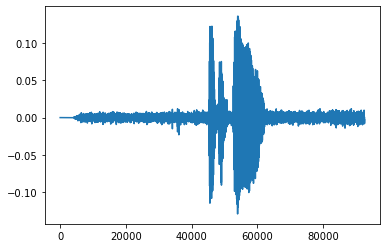

In [120]:
zero_crossings = librosa.zero_crossings(wav, pad=False)

print(zero_crossings)
print(sum(zero_crossings)) # 음 <-> 양 이동한 횟수

plt.plot(wav)

### Harmonic and Percussive Components
- Harmonics : 사람의 귀로 구분할 수 없는 특징들(음악의 색깔)
- Percussives: 리듬과 감정을 나타내는 충격파

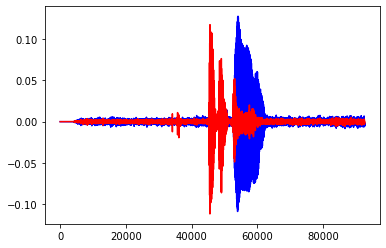

In [122]:
y_harm, y_perc = librosa.effects.hpss(wav)

plt.plot(y_harm, color='b')
plt.plot(y_perc, color='r')
plt.show()

### Spectral Centroid
소리를 주파수 표현했을 때, 주파수의 가중평균을 계산하여 소리의 "무게 중심"이 어딘지를 알려주는 지표  


C:\Users\lynn1\AppData\Local\Temp\ipykernel_1612\1176357826.py:1: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00573423 -0.006901
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(wav, sr=samplerate)[0]


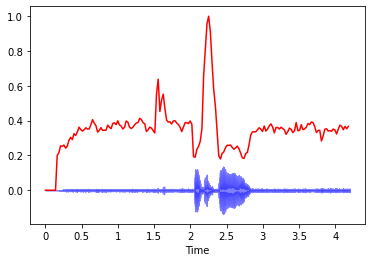

In [124]:
spectral_centroids = librosa.feature.spectral_centroid(wav, sr=samplerate)[0]

#Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)    #sk.minmax_scale() : 최대 최소를 0 ~ 1 로 맞춰준다.

librosa.display.waveshow(wav, sr=samplerate, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()